# Google Colab 한글 폰트 설치

In [ ]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


- 테스트

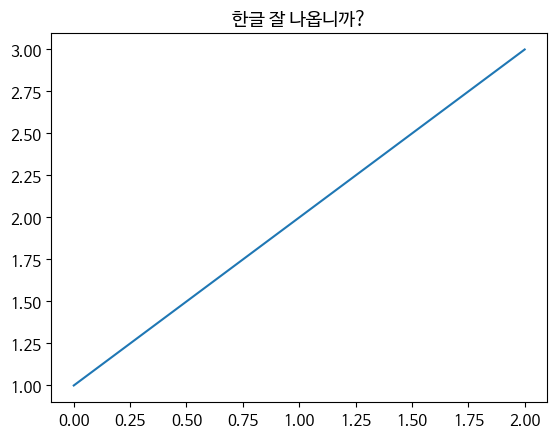

In [ ]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# Google Colab과 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 독립성 검정 문제
- 주어진 데이터(dataset/student.csv)는 A 대학생의 학생 300명을 대상으로 각 학생이 속한 단과대학과 이번 학기 수강 과목 수를 조사한 결과이다. 이를 이용하여 단과대학별로 수강 과목 수에 차이가 있는지 카이제곱검정을 통해 답하고자 한다. 가설은 아래와 같다.
- 가설검정
    + 귀무가설 : 단과대학과 수강 과목 수는 서로 독립적이다. (관련이 없다.)
    + 대립가설 : 단과대학에 속한 학생들이 수강하는 과목 수는 단과대학에 따라 차이가 있다. (관련이 있다.)
- 문제 1: 주어진 데이터로 단과대학과 수강 과목 수로 분할표를 만들었을 때, 수강 과목 수가 '6개 이상'인 학생 수가 가장 많은 단과대학을 출력하시오.
- 문제 2: 위의 가설을 검정하기 위한 검정통계량을 구하시오. (반올림하여 소숫점 둘째 자리까지 계산)
- 문제 3: 위의 통계량에 대한 p-값을 구하고 (반올림하여 소숫점 넷째 자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오.  

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2024_2025/imbank/dataset/student.csv")
df.head()

,ID,단과대학,수강 과목 수
0,1,경영대학,4개 이하
1,2,경영대학,4개 이하
2,3,경영대학,4개 이하
3,4,경영대학,4개 이하
4,5,경영대학,4개 이하


### 문제 1 코드

In [ ]:
result_df = pd.crosstab(df['단과대학'], df['수강 과목 수'])
result = result_df[result_df['6개 이상'] == result_df['6개 이상'].max()]
result.index[0]

'경영대학'

### 문제 2 코드

In [ ]:
X1 = result_df.loc['경영대학', :]
X2 = result_df.loc['자연대학', :]
X3 = result_df.loc['공과대학', :]

In [ ]:
from scipy import stats

result = stats.chi2_contingency([X1, X2, X3])
result

Chi2ContingencyResult(statistic=30.127525252525256, pvalue=4.6103966676496775e-06, dof=4, expected_freq=array([[28.8, 64.8, 26.4],
       [19.2, 43.2, 17.6],
       [24. , 54. , 22. ]]))

In [ ]:
f_score, p_value = result[0], result[1]
print(round(f_score, 4), round(p_value, 4))

30.1275 0.0


### 문제 3 코드

In [ ]:
if p_value >= 0.05:
    print("귀무가설 채택")
else:
    print("귀무가설 기각")

## 적합도 검정
- 주어진 데이터(dataset/cellphone.csv)는 A회사의 직원 200명을 대상으로 현재 사용하고 있는 스마트폰 제조사를 조사한 결과이다. 최근 조사에 따르면, 스마트폰 제조사 점유율은 삼성 60%, 애플 30%, 기타 10%라고 한다. 이를 이용하여 A회사의 직원들이 사용하는 스마트폰 제조사 분포가 국내 스마트폰 제조사 점유율 분포와 동일한지 카이제곱검정을 통해 답하고자 한다.  
- 가설검정
    + 귀무가설 : A 회사 직원들이 사용하는 스마트폰 제조사 분포는 국내 스마트폰 제조사 점유율 분포를 따른다.
    + 대립가설 : A 회사 직원들이 사용하는 스마트폰 제조사 분포는 국내 스마트폰 제조사 점유율 분포를 따르지 않는다.
- 문제 1: 삼성 제조사 스마트폰 사용 직원 수에서 애플 제조사 스마트폰 사용 직원 수를 뺀 값을 정수로 출력하시오.
- 문제 2: 문제에서 제시된 국내 스마트폰 제조사 점유율을 이용하여 기대 빈도를 계산하고, 위의 가설을 검정하기 위한 검정통계량을 구하시오. (반올림하여 소숫점 둘째 자리까지 계산)
- 문제 3: 위의 통계량에 대한 p-값을 구하고 (반올림하여 소숫점 넷째 자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2024_2025/imbank/dataset/cellphone.csv")
df.head()

,id,제조사
0,1,삼성
1,2,애플
2,3,삼성
3,4,애플
4,5,애플


### 문제 1 코드

In [ ]:
count_df = df.groupby('제조사').count()
result = count_df.loc['삼성', 'id'] - count_df.loc['애플', 'id']
print(result)

39


### 문제 2 코드

In [ ]:
total_sum = len(df)
expected = [int(total_sum) * 0.1, # 기타 제조사 기대빈도
            int(total_sum) * 0.6, # 삼성 제조사 기대빈도
            int(total_sum) * 0.3, # 애플 제조사 기대빈도
           ]
# 기대빈도 구하기
print(expected)

[20.0, 120.0, 60.0]


In [ ]:
observed = count_df['id'].values
f_score, p_value = stats.chisquare(observed, f_exp = expected)

print(round(f_score, 2), round(p_value, 2))

16.73 0.0


### 문제 3 코드

In [ ]:
if p_value >= 0.05:
    print("귀무가설 채택")
else:
    print("귀무가설 기각")

귀무가설 기각
